In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm, ttest_1samp, ttest_ind, ttest_rel, chi2, chisquare, chi2_contingency,stats
from scipy.stats import f_oneway, kruskal, levene, shapiro, pearsonr, spearmanr
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('/content/ola_driver_scaler.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [24]:
df = df.drop('Unnamed: 0',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [25]:
df.rename(columns={'MMM-YY':'ReportingDate'},inplace=True)

In [26]:
df['ReportingDate'] = pd.to_datetime(df['ReportingDate'],format='mixed')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'],format='mixed')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'],format='mixed')
df['Employment_Status'] = np.where(df['LastWorkingDate'].isnull(), 0, 1)


In [27]:
end_date = df['ReportingDate'].max()
df['Tenure'] = round(((end_date - df['Dateofjoining']).dt.days)/365,0)

In [28]:
#def convert_to_categorical(df, categorical_features):
#   for col in categorical_features:
#        if col in df.columns:
#            df[col] = df[col].astype('category')
#        else:
#            print(f"Column '{col}' not found in DataFrame.")
#    return df

#cat_features = ['Driver_ID', 'Gender', 'Education_Level', 'Joining Designation', 'Grade', 'Quarterly Rating', 'Employment_Status', 'Tenure']
#df = convert_to_categorical(df, cat_features)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ReportingDate         19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
 13  Employment_Statu

In [29]:
numerical = df.select_dtypes(include=['int64','float64']).columns
categorical = df.select_dtypes(include='object').columns
date_cols = df.select_dtypes(include='datetime64[ns]').columns

In [30]:
QR1 =  (df.groupby('Driver_ID').agg({'Quarterly Rating':'first','Income':'first'})[['Quarterly Rating','Income']]).reset_index()
QR2 =  (df.groupby('Driver_ID').agg({'Quarterly Rating':'last','Income':'last'})[['Quarterly Rating','Income']]).reset_index()

In [31]:
a = df.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna().reset_index()
a

,Driver_ID,LastWorkingDate
0,1,False
1,2,True
2,4,False
3,5,False
4,6,True
...,...,...
2376,2784,True
2377,2785,False
2378,2786,False
2379,2787,False


In [32]:
a = a.merge(QR1,on='Driver_ID')
a = a.merge(QR2,on='Driver_ID')
a

,Driver_ID,LastWorkingDate,Quarterly Rating_x,Income_x,Quarterly Rating_y,Income_y
0,1,False,2,57387,2,57387
1,2,True,1,67016,1,67016
2,4,False,1,65603,1,65603
3,5,False,1,46368,1,46368
4,6,True,1,78728,2,78728
...,...,...,...,...,...,...
2376,2784,True,3,82815,4,82815
2377,2785,False,1,12105,1,12105
2378,2786,False,2,35370,1,35370
2379,2787,False,2,69498,1,69498


In [33]:
a['Rating_change'] = np.where(a['Quarterly Rating_x'] == a['Quarterly Rating_y'], 0,1)
a['Income_Change'] = np.where(a['Income_x'] == a['Income_y'], 0,1)
a=a[['Driver_ID','Rating_change','Income_Change']]
a

,Driver_ID,Rating_change,Income_Change
0,1,0,0
1,2,0,0
2,4,0,0
3,5,0,0
4,6,1,0
...,...,...,...
2376,2784,1,0
2377,2785,0,0
2378,2786,1,0
2379,2787,1,0


In [34]:
df1 = df.copy()
df1 = df1.groupby('Driver_ID').agg({'ReportingDate':'count',
    "Age": "max",
    "Gender": "last",
    "City": "last",
    "Education_Level": "last",
    "Income": 'sum',
    "Dateofjoining": "first",
    "LastWorkingDate": "last",
    "Joining Designation": "last",
    "Grade": "last",
    "Total Business Value": "sum",
    "Quarterly Rating": 'first',
    "Tenure": "max",
    "Employment_Status": "last",}).reset_index()
df1.rename(columns={'ReportingDate':'NoOfReportings'},inplace=True)
df1.head()

,Driver_ID,NoOfReportings,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Tenure,Employment_Status
0,1,3,28.0,0.0,C23,2,172161,2018-12-24,2019-03-11,1,1,1715580,2,2.0,1
1,2,2,31.0,0.0,C7,2,134032,2020-11-06,NaT,2,2,0,1,0.0,0
2,4,5,43.0,0.0,C13,2,328015,2019-12-07,2020-04-27,2,2,350000,1,1.0,1
3,5,3,29.0,0.0,C9,0,139104,2019-01-09,2019-03-07,1,1,120360,1,2.0,1
4,6,5,31.0,1.0,C11,1,393640,2020-07-31,NaT,3,3,1265000,1,0.0,0


In [35]:
df1.shape

(2381, 15)

In [36]:
df1.reset_index(drop=True, inplace=True)
df1['Age'] = df1['Age'].astype('int64')
df1['Gender'] = df1['Gender'].astype('int64')
#df1['City'] = df1['City'].str.extract(r'(\d+)', expand=False).astype(int)
df1 = df1.merge(a,on='Driver_ID')
df1.head()

,Driver_ID,NoOfReportings,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Tenure,Employment_Status,Rating_change,Income_Change
0,1,3,28,0,C23,2,172161,2018-12-24,2019-03-11,1,1,1715580,2,2.0,1,0,0
1,2,2,31,0,C7,2,134032,2020-11-06,NaT,2,2,0,1,0.0,0,0,0
2,4,5,43,0,C13,2,328015,2019-12-07,2020-04-27,2,2,350000,1,1.0,1,0,0
3,5,3,29,0,C9,0,139104,2019-01-09,2019-03-07,1,1,120360,1,2.0,1,0,0
4,6,5,31,1,C11,1,393640,2020-07-31,NaT,3,3,1265000,1,0.0,0,1,0


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   NoOfReportings        2381 non-null   int64         
 2   Age                   2381 non-null   int64         
 3   Gender                2381 non-null   int64         
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   int64         
 6   Income                2381 non-null   int64         
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   2381 non-null   int64         
 10  Grade                 2381 non-null   int64         
 11  Total Business Value  2381 non-null   int64         
 12  Quarterly Rating      2381 non-null   int64         
 13  Tenure            

In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_cols = ["City"]  # Add more if needed
for col in categorical_cols:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
    label_encoders[col] = le

In [39]:
df1.head()

,Driver_ID,NoOfReportings,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Tenure,Employment_Status,Rating_change,Income_Change
0,1,3,28,0,15,2,172161,2018-12-24,2019-03-11,1,1,1715580,2,2.0,1,0,0
1,2,2,31,0,26,2,134032,2020-11-06,NaT,2,2,0,1,0.0,0,0,0
2,4,5,43,0,4,2,328015,2019-12-07,2020-04-27,2,2,350000,1,1.0,1,0,0
3,5,3,29,0,28,0,139104,2019-01-09,2019-03-07,1,1,120360,1,2.0,1,0,0
4,6,5,31,1,2,1,393640,2020-07-31,NaT,3,3,1265000,1,0.0,0,1,0


In [40]:
df1[['Driver_ID','NoOfReportings','Employment_Status']].sort_values(by='NoOfReportings',ascending=False)

,Driver_ID,NoOfReportings,Employment_Status
2376,2784,24,0
2351,2753,24,0
2366,2771,24,0
1489,1745,24,0
2363,2766,24,1
...,...,...,...
114,136,1,1
116,138,1,1
2313,2710,1,1
1488,1744,1,1


<Axes: xlabel='Rating_change', ylabel='count'>

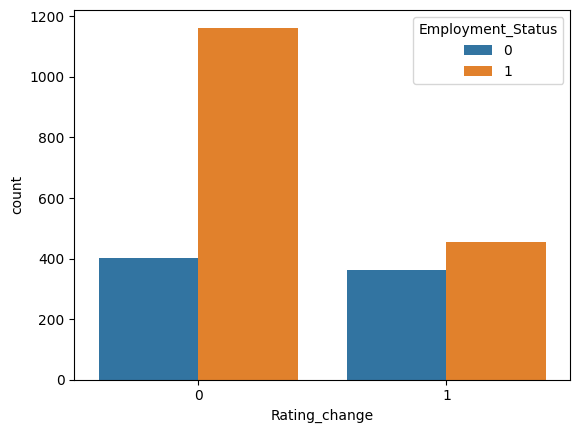

In [41]:
sns.countplot(data=df1,x='Rating_change',hue='Employment_Status')

## **Uni-Variate Analyses**

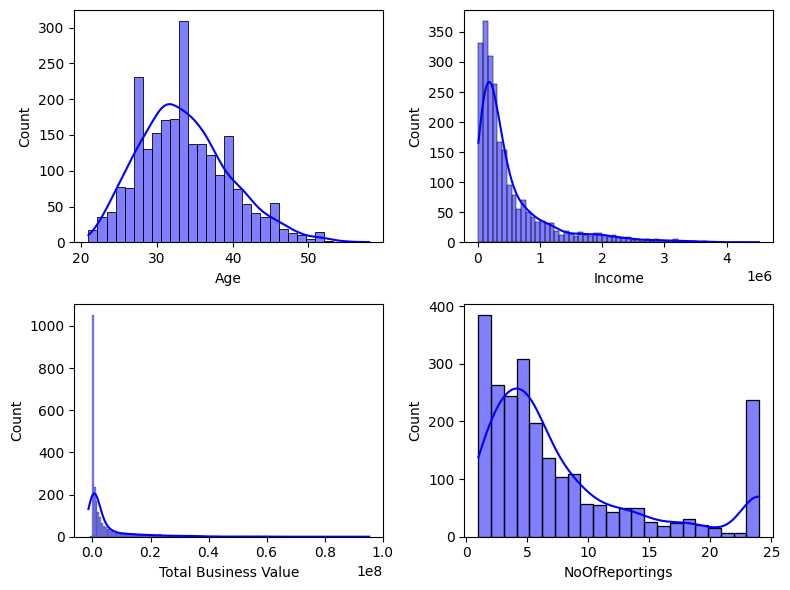

In [42]:
Numeric = ['Age','Income','Total Business Value','NoOfReportings']
fig, axes = plt.subplots(2,2,figsize=(8,6))
for i,ax in enumerate(axes.flatten()):
  sns.histplot(data=df1,x=Numeric[i],ax=ax,kde=True,color='blue')
  plt.tight_layout()
plt.show()

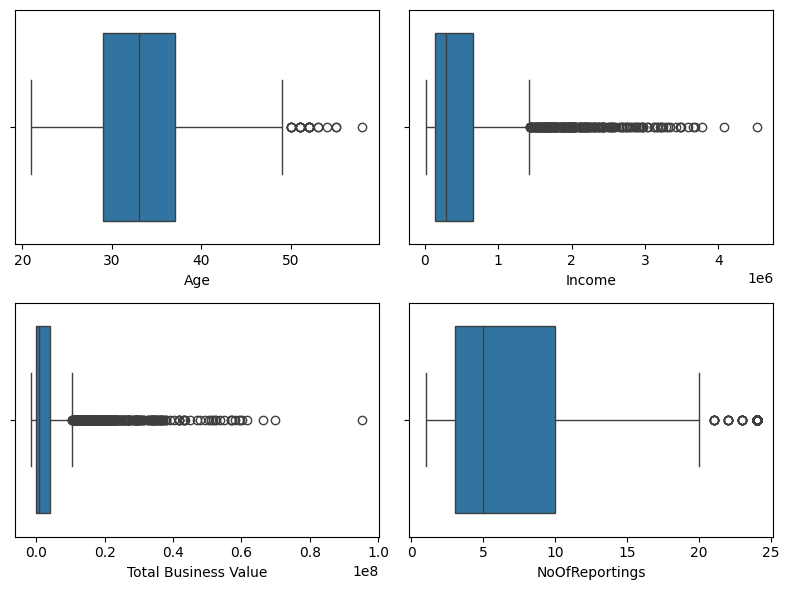

In [43]:
Numeric = ['Age','Income','Total Business Value','NoOfReportings']
fig, axes = plt.subplots(2,2,figsize=(8,6))
for i,ax in enumerate(axes.flatten()):
  sns.boxplot(data=df1,x=Numeric[i],ax=ax)
  plt.tight_layout()
plt.show()

In [44]:
df1.columns

Index(['Driver_ID', 'NoOfReportings', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Tenure', 'Employment_Status', 'Rating_change',
       'Income_Change'],
      dtype='object')

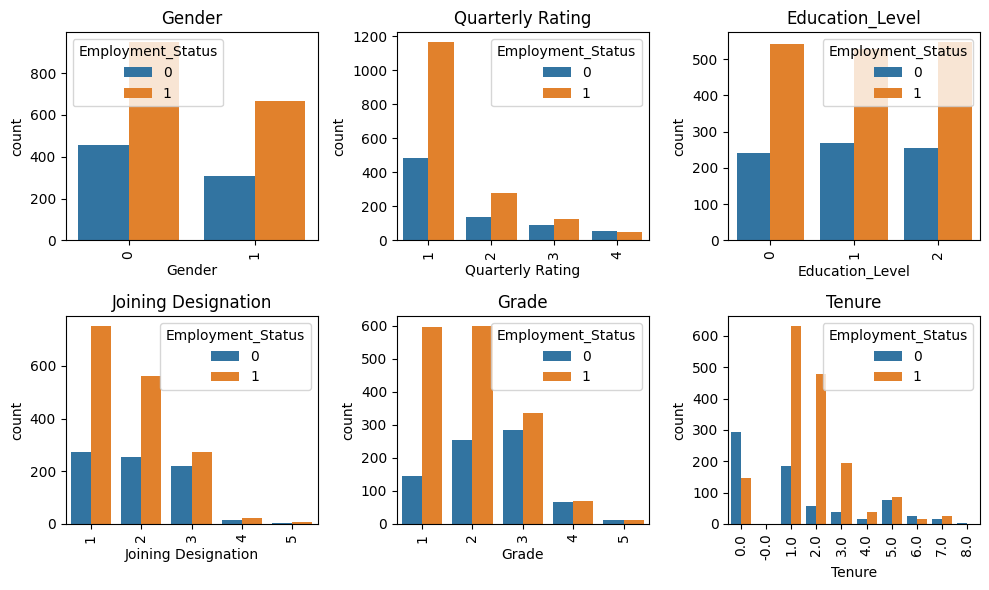

In [45]:
features = ['Gender', 'Quarterly Rating','Education_Level','Joining Designation', 'Grade', 'Tenure']
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
  if i < len(features):
    sns.countplot(data=df1, x=features[i], ax=ax, hue='Employment_Status',legend=True)
    ax.set_title(features[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [46]:
df3.info()

NameError: name 'df3' is not defined

In [ ]:
df3.describe()

In [ ]:
def convert_to_categorical(df, categorical_features):
   for col in categorical_features:
        if col in df.columns:
            df[col] = df[col].astype('category')
        else:
            print(f"Column '{col}' not found in DataFrame.")
    return df

cat_features = ['Driver_ID', 'Gender', 'Education_Level', 'Joining Designation', 'Grade', 'Quarterly Rating', 'Employment_Status', 'Tenure']
df3 = convert_to_categorical(df3, cat_features)

## **Outliers Treatment**

In [47]:
num_cols = ['Age','Income','Total Business Value','NoOfReportings']
Q1 = df1[num_cols].quantile(0.25)
Q3 = df1[num_cols].quantile(0.75)
IQR = Q3-Q1
df2 = df1[~((df1[num_cols]< (Q1-1.5*IQR))|(df1[num_cols]> (Q1+1.5*IQR))).any(axis=1)].reset_index(drop=True)
df3 = df1[((df1[num_cols]< (Q1-1.5*IQR))|(df1[num_cols]> (Q1+1.5*IQR))).any(axis=1)].reset_index(drop=True)
df2.head()

,Driver_ID,NoOfReportings,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Tenure,Employment_Status,Rating_change,Income_Change
0,1,3,28,0,15,2,172161,2018-12-24,2019-03-11,1,1,1715580,2,2.0,1,0,0
1,2,2,31,0,26,2,134032,2020-11-06,NaT,2,2,0,1,0.0,0,0,0
2,5,3,29,0,28,0,139104,2019-01-09,2019-03-07,1,1,120360,1,2.0,1,0,0
3,6,5,31,1,2,1,393640,2020-07-31,NaT,3,3,1265000,1,0.0,0,1,0
4,8,3,34,0,11,0,211968,2020-09-19,2020-11-15,3,3,0,1,0.0,1,0,0


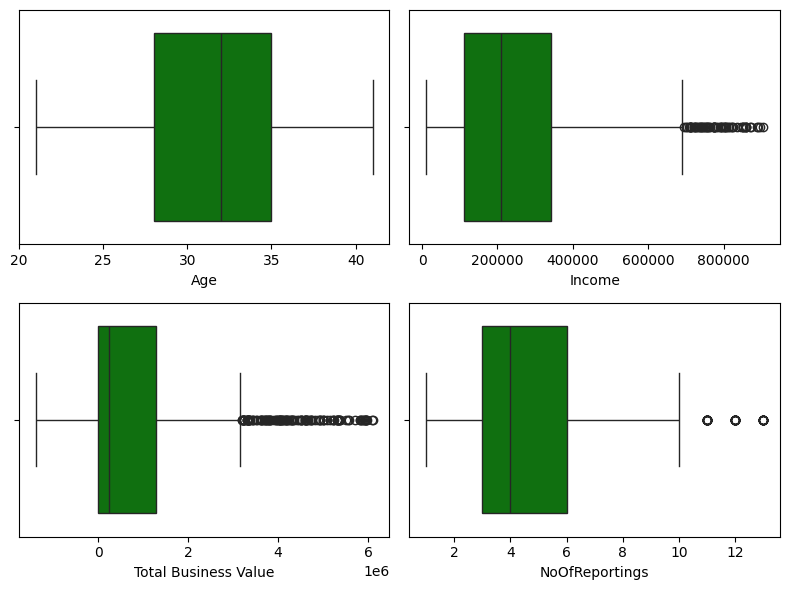

In [48]:
Numeric = ['Age','Income','Total Business Value','NoOfReportings']
fig, axes = plt.subplots(2,2,figsize=(8,6))
for i,ax in enumerate(axes.flatten()):
  sns.boxplot(data=df2,x=Numeric[i],ax=ax,color='green')
  plt.tight_layout()
plt.show()

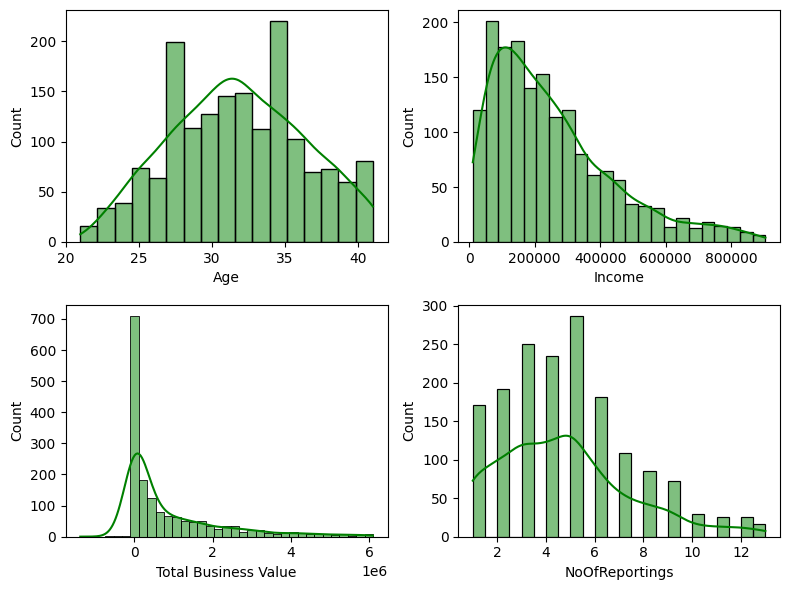

In [49]:
Numeric = ['Age','Income','Total Business Value','NoOfReportings']
fig, axes = plt.subplots(2,2,figsize=(8,6))
for i,ax in enumerate(axes.flatten()):
  sns.histplot(data=df2,x=Numeric[i],ax=ax,kde=True,color='green')
  plt.tight_layout()
plt.show()

In [50]:
df2.shape,df3.shape

((1680, 17), (701, 17))

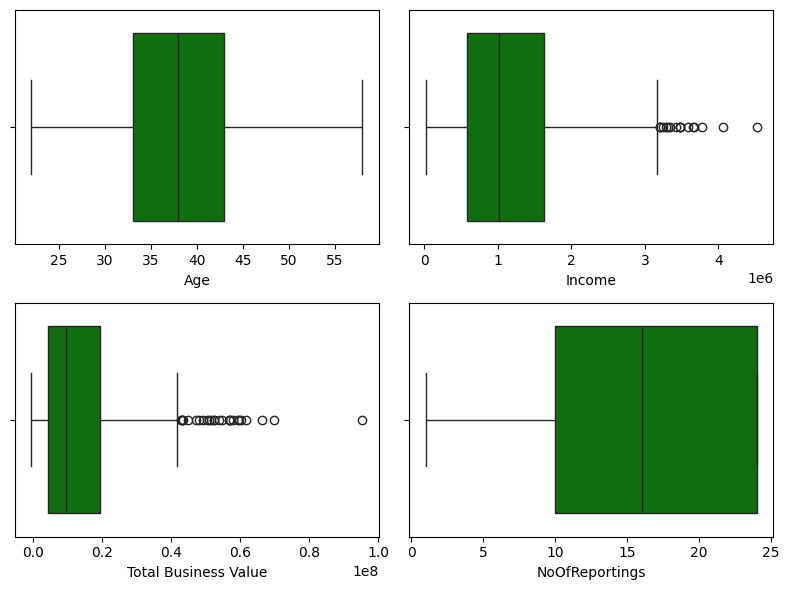

In [51]:
Numeric = ['Age','Income','Total Business Value','NoOfReportings']
fig, axes = plt.subplots(2,2,figsize=(8,6))
for i,ax in enumerate(axes.flatten()):
  sns.boxplot(data=df3,x=Numeric[i],ax=ax,color='green')
  plt.tight_layout()
plt.show()

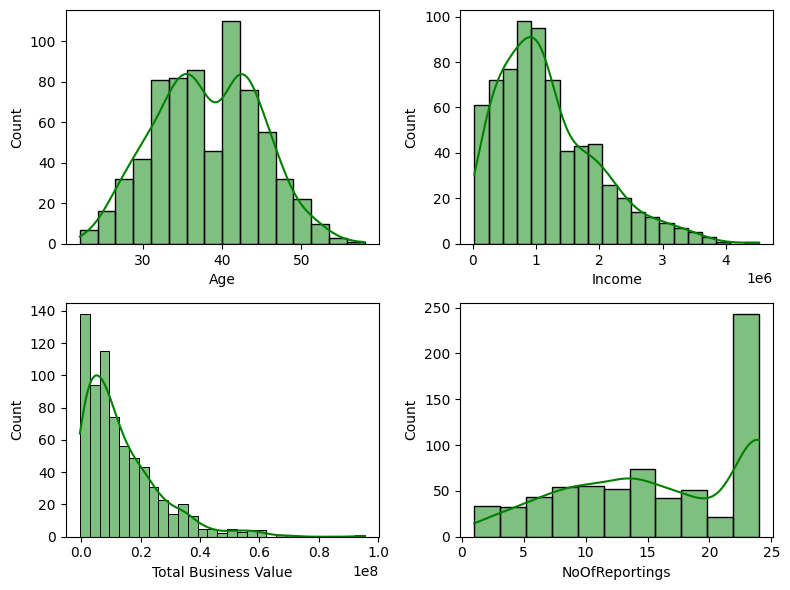

In [52]:
Numeric = ['Age','Income','Total Business Value','NoOfReportings']
fig, axes = plt.subplots(2,2,figsize=(8,6))
for i,ax in enumerate(axes.flatten()):
  sns.histplot(data=df3,x=Numeric[i],ax=ax,kde=True,color='green')
  plt.tight_layout()
plt.show()

## **Bi-Variate Analyses**

In [53]:
df1.columns

Index(['Driver_ID', 'NoOfReportings', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Tenure', 'Employment_Status', 'Rating_change',
       'Income_Change'],
      dtype='object')

<Axes: >

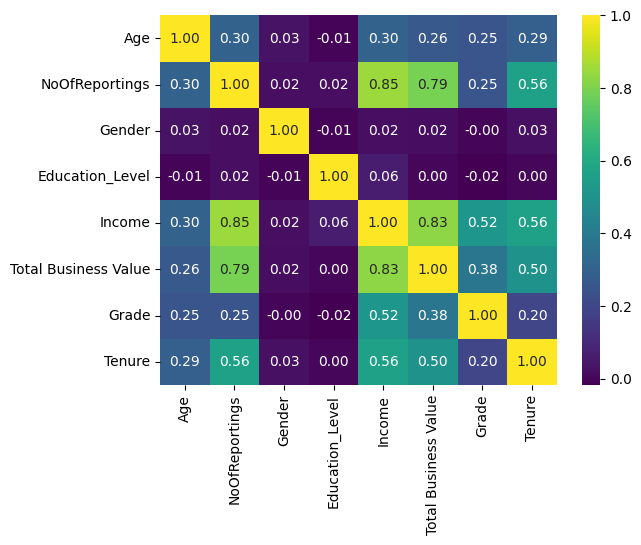

In [54]:
correlation = df1[['Age','NoOfReportings','Gender','Education_Level','Income','Total Business Value','Grade','Tenure']].corr()
sns.heatmap(data=correlation,annot=True, fmt=".2f",cmap = 'viridis')

## **Models Training**

In [55]:
df1.head()

,Driver_ID,NoOfReportings,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Tenure,Employment_Status,Rating_change,Income_Change
0,1,3,28,0,15,2,172161,2018-12-24,2019-03-11,1,1,1715580,2,2.0,1,0,0
1,2,2,31,0,26,2,134032,2020-11-06,NaT,2,2,0,1,0.0,0,0,0
2,4,5,43,0,4,2,328015,2019-12-07,2020-04-27,2,2,350000,1,1.0,1,0,0
3,5,3,29,0,28,0,139104,2019-01-09,2019-03-07,1,1,120360,1,2.0,1,0,0
4,6,5,31,1,2,1,393640,2020-07-31,NaT,3,3,1265000,1,0.0,0,1,0


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_curve
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

In [57]:
X=df1.drop(['Employment_Status','LastWorkingDate','Driver_ID','Dateofjoining'],axis=1)
y = df1['Employment_Status'].copy()
X.shape,y.shape

((2381, 13), (2381,))

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1904, 13), (477, 13), (1904,), (477,))

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
y_train.value_counts()

,count
Employment_Status,
1,1289
0,615


In [61]:
smote = SMOTE(sampling_strategy=0.8, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape, y_train_resampled.shape

((2320, 13), (2320,))

In [62]:
y_train_resampled.value_counts()

,count
Employment_Status,
1,1289
0,1031


**KNN model**

In [63]:
model1 = KNeighborsClassifier(n_neighbors=7)
model1.fit(X_train_resampled,y_train_resampled)
y_pred = model1.predict(X_test)
print('\033[1mClassification Report for Test data:\033[0m\n',classification_report(y_test,y_pred))
print('\033[1mClassification Report for Train data:\033[0m\n',classification_report(y_train_resampled,model1.predict(X_train_resampled)))

Classification Report for Test data:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71       150
           1       0.87      0.86      0.86       327

    accuracy                           0.81       477
   macro avg       0.78      0.79      0.78       477
weighted avg       0.81      0.81      0.81       477

Classification Report for Train data:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1031
           1       0.91      0.88      0.89      1289

    accuracy                           0.88      2320
   macro avg       0.88      0.89      0.88      2320
weighted avg       0.89      0.88      0.88      2320



**Descision Tree model**

In [64]:
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train_resampled,y_train_resampled)
y_pred1 = model2.predict(X_test)
print('\033[1mClassification Report for Test data:\033[0m\n',classification_report(y_test,y_pred1))
print('\033[1mClassification Report for Train data:\033[0m\n',classification_report(y_train_resampled,model2.predict(X_train_resampled)))

Classification Report for Test data:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       150
           1       0.87      0.90      0.89       327

    accuracy                           0.84       477
   macro avg       0.82      0.81      0.81       477
weighted avg       0.84      0.84      0.84       477

Classification Report for Train data:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      1031
           1       0.85      0.91      0.88      1289

    accuracy                           0.86      2320
   macro avg       0.86      0.85      0.86      2320
weighted avg       0.86      0.86      0.86      2320



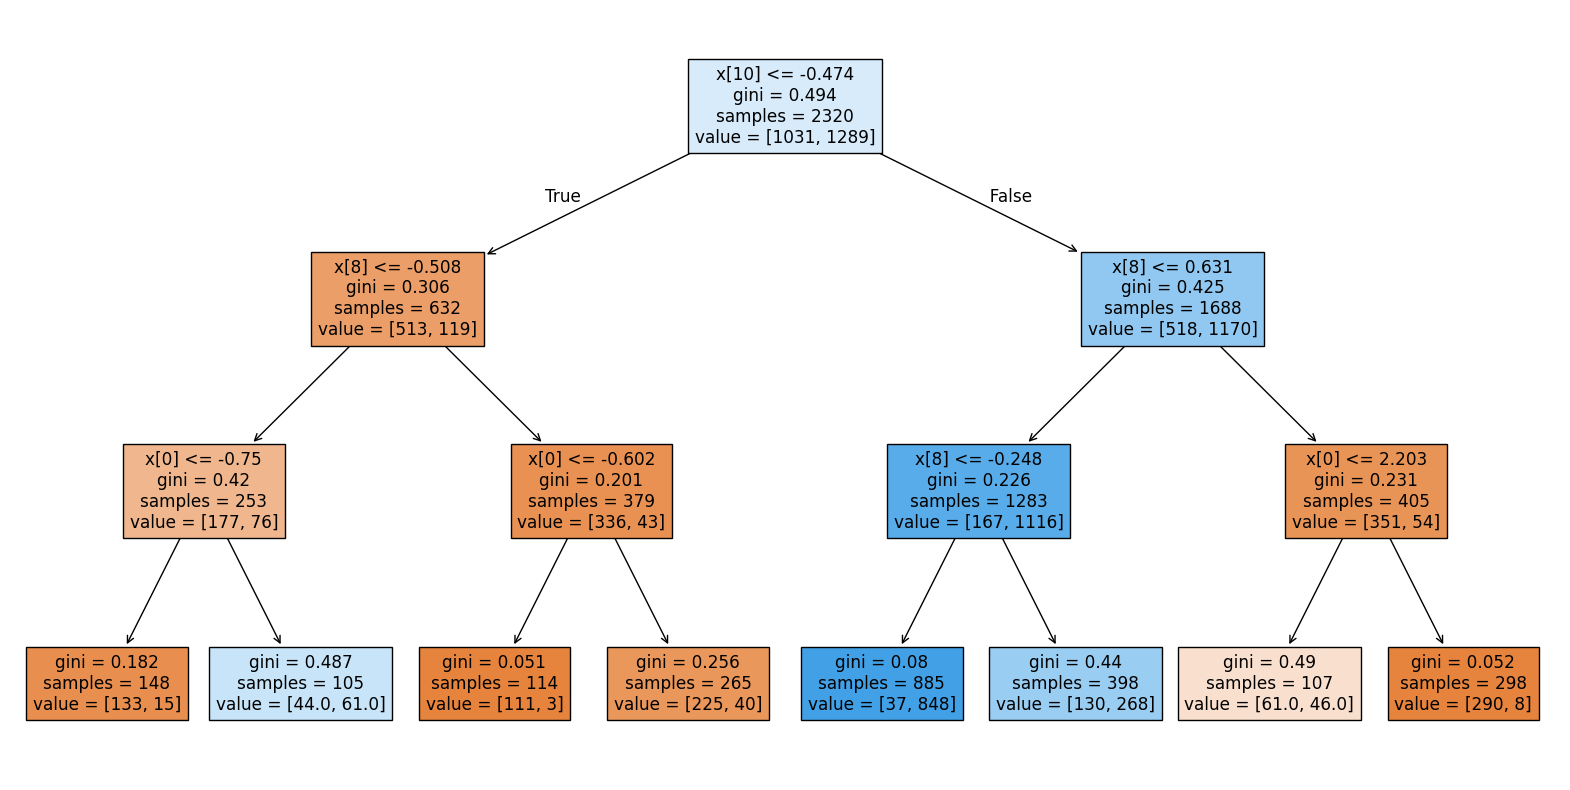

In [65]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model2,filled=True)
plt.show()

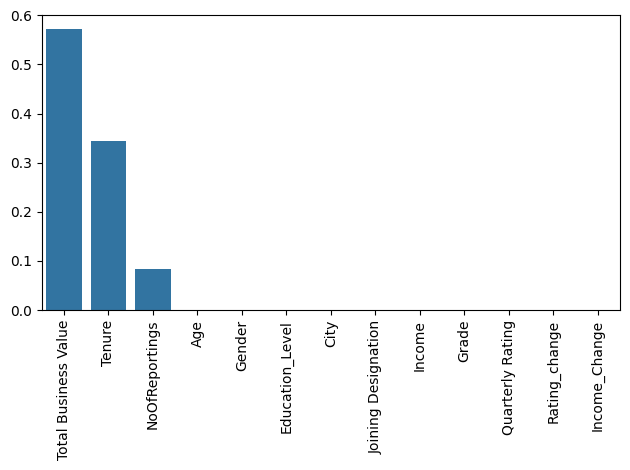

In [66]:
feature_importance = model2.feature_importances_
features = X.columns
feature_importance_dict = dict(zip(features, feature_importance))
feature_importance_series = pd.Series(feature_importance_dict).sort_values(ascending=False)
sns.barplot(feature_importance_series)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Ensemble Models - RandomForest**

In [67]:
model3 = RandomForestClassifier(n_estimators=100,max_depth=8,min_samples_split=2)
model3.fit(X_train_resampled,y_train_resampled)
y_pred2 = model3.predict(X_test)
print('\033[1mClassification Report for Test data:\033[0m\n',classification_report(y_test,y_pred2))
print('\033[1mClassification Report for Train data:\033[0m\n',classification_report(y_train_resampled,model3.predict(X_train_resampled)))

Classification Report for Test data:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       150
           1       0.93      0.91      0.92       327

    accuracy                           0.90       477
   macro avg       0.88      0.89      0.88       477
weighted avg       0.90      0.90      0.90       477

Classification Report for Train data:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1031
           1       0.96      0.93      0.95      1289

    accuracy                           0.94      2320
   macro avg       0.94      0.94      0.94      2320
weighted avg       0.94      0.94      0.94      2320



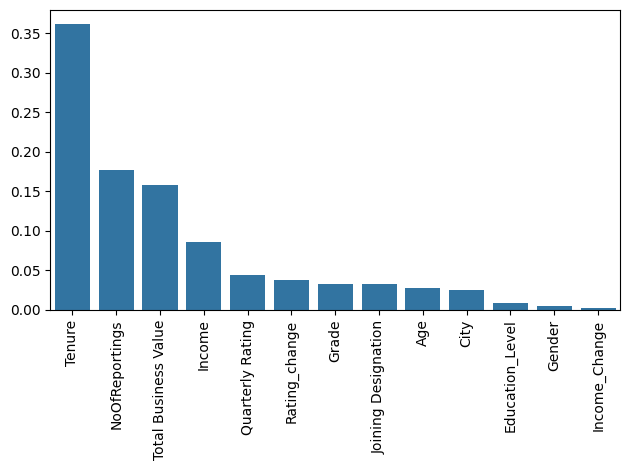

In [68]:
feature_importance = model3.feature_importances_
features = X.columns
feature_importance_dict = dict(zip(features, feature_importance))
feature_importance_series = pd.Series(feature_importance_dict).sort_values(ascending=False)
sns.barplot(feature_importance_series)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Accuracy with 1 estimators: 0.8259958071278826
Accuracy with 5 estimators: 0.8846960167714885
Accuracy with 10 estimators: 0.8721174004192872
Accuracy with 20 estimators: 0.89937106918239
Accuracy with 50 estimators: 0.9014675052410901
Accuracy with 100 estimators: 0.909853249475891
Accuracy with 200 estimators: 0.9056603773584906
Accuracy with 300 estimators: 0.9035639412997903
Accuracy with 500 estimators: 0.9014675052410901


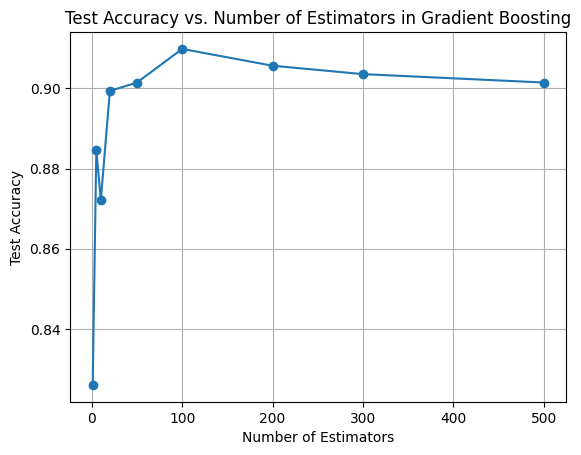

In [ ]:
# Initialize the number of estimators
n_estimators_list = [1, 5, 10, 20, 50, 100, 200, 300, 500]
test_accuracies = []

# TODO: Train and evaluate the model with different numbers of weak learners
for n_estimators in n_estimators_list:
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=10)
    clf.fit(X_train_resampled, y_train_resampled)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    test_accuracies.append(accuracy)
    print(f"Accuracy with {n_estimators} estimators: {accuracy}")

# Plotting the test accuracies
plt.plot(n_estimators_list, test_accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Estimators in Gradient Boosting')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Defining the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300,500],
    'max_depth': [3,5,8],
    'min_samples_split': [2, 4, 6]
}

# Initializing the Gradient Boosting Classifier
Rf = RandomForestClassifier(random_state=10)

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(Rf, param_grid, scoring = "accuracy", cv=2, n_jobs = -1, verbose = 1)


# Fitting the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Printing the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

result = grid_search.cv_results_
for i in range(len(result["params"])):
  print(f"Parameters:{result['params'][i]} Mean_score: {result['mean_test_score'][i]} Rank: {result['rank_test_score'][i]}")

print(grid_search.best_estimator_)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best parameters: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.8913793103448275
Parameters:{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100} Mean_score: 0.8422413793103448 Rank: 30
Parameters:{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200} Mean_score: 0.840948275862069 Rank: 35
Parameters:{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300} Mean_score: 0.8439655172413794 Rank: 25
Parameters:{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500} Mean_score: 0.8418103448275862 Rank: 32
Parameters:{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100} Mean_score: 0.8422413793103448 Rank: 30
Parameters:{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 200} Mean_score: 0.840948275862069 Rank: 35
Parameters:{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 300} Mean_score: 0.8435344827586206 Rank: 26
Parameters:{'max_depth'

**Ensemble models - Boosting**

In [69]:
model4 = GradientBoostingClassifier(n_estimators=100,random_state=20,loss='log_loss')
model4.fit(X_train_resampled,y_train_resampled)


GradientBoostingClassifier(random_state=20)

In [70]:
y_pred3 = model4.predict(X_test)
print('\033[1mClassification Report for Test data:\033[0m\n',classification_report(y_test,y_pred3))
print('\033[1mClassification Report for Train data:\033[0m\n',classification_report(y_train_resampled,model4.predict(X_train_resampled)))

Classification Report for Test data:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       150
           1       0.94      0.93      0.93       327

    accuracy                           0.91       477
   macro avg       0.89      0.89      0.89       477
weighted avg       0.91      0.91      0.91       477

Classification Report for Train data:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      1031
           1       0.95      0.92      0.94      1289

    accuracy                           0.93      2320
   macro avg       0.93      0.93      0.93      2320
weighted avg       0.93      0.93      0.93      2320



Accuracy with 1 estimators: 0.6855345911949685
Accuracy with 5 estimators: 0.8679245283018868
Accuracy with 10 estimators: 0.8763102725366876
Accuracy with 20 estimators: 0.8972746331236897
Accuracy with 50 estimators: 0.9056603773584906
Accuracy with 100 estimators: 0.9077568134171907
Accuracy with 200 estimators: 0.8951781970649895
Accuracy with 300 estimators: 0.8951781970649895
Accuracy with 500 estimators: 0.8909853249475891


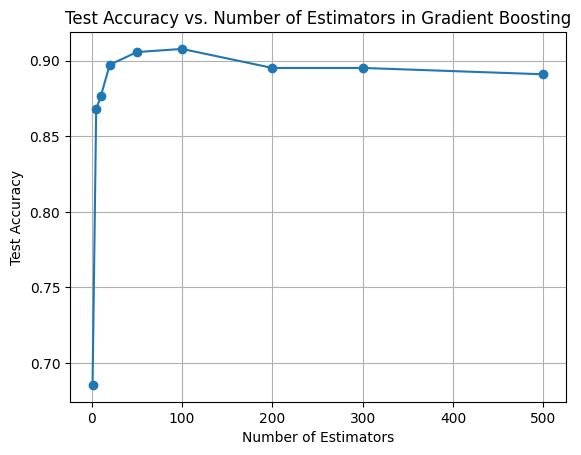

In [ ]:
# Initialize the number of estimators
n_estimators_list = [1, 5, 10, 20, 50, 100, 200, 300, 500]
test_accuracies = []

# TODO: Train and evaluate the model with different numbers of weak learners
for n_estimators in n_estimators_list:
    clf = GradientBoostingClassifier(n_estimators=n_estimators, random_state=10)
    clf.fit(X_train_resampled, y_train_resampled)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    test_accuracies.append(accuracy)
    print(f"Accuracy with {n_estimators} estimators: {accuracy}")

# Plotting the test accuracies
plt.plot(n_estimators_list, test_accuracies, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Estimators in Gradient Boosting')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# Defining the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3,5, 8],
    'min_samples_split': [2, 4, 6]
}

# Initializing the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=10)

# Setting up the grid search with cross-validation
grid_search = GridSearchCV(gbm, param_grid, scoring = "accuracy", cv=2, n_jobs = -1, verbose = 1)


# Fitting the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Printing the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

result = grid_search.cv_results_
for i in range(len(result["params"])):
  print(f"Parameters:{result['params'][i]} Mean_score: {result['mean_test_score'][i]} Rank: {result['rank_test_score'][i]}")

print(grid_search.best_estimator_)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
Best parameters: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
Best cross-validation score: 0.8844827586206896
Parameters:{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100} Mean_score: 0.8801724137931035 Rank: 3
Parameters:{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200} Mean_score: 0.8771551724137931 Rank: 11
Parameters:{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300} Mean_score: 0.8711206896551724 Rank: 25
Parameters:{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100} Mean_score: 0.8844827586206896 Rank: 1
Parameters:{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 200} Mean_score: 0.8797413793103448 Rank: 4
Parameters:{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 300} Mean_score: 0.8719827586206896 Rank: 24
Parameters:{'max_depth': 3, 'min_samples_split': 6, 'n_estimators': 100} Mean_score: 0.881896551724138 Rank: 2
Parameters:{'max_depth': 3

**Saving the Model**

In [71]:
X.columns

Index(['NoOfReportings', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Tenure', 'Rating_change', 'Income_Change'],
      dtype='object')

In [75]:
import pickle
pickle_out = open('Ola_Model.pkl',mode='wb')
pickle.dump((model4,scaler),pickle_out)
pickle_out.close()